### Growing a Decision Tree
- Decision Tree를 성장(만드는)시키는 알고리즘이 필요
- 어떻게 하면 가장 분기(branch)를 잘 만들 수 있는가?
- Data의 attribute를 기준으로 branch 생성
- 어떤 attribute를 기준으로 할 때 가장 Entropy가 작은가?
- 하나를 자른 후에 그 다음은 어떻게 할 것인가?

---

- Decision Tree는 재귀적으로 생김
- "대상 라벨에 대해 어떤 attribute가 더 <b>확실한 정보</b>를 제공하고 있는가?"로 branch attribute를 선택
- 확실한 정보의 선택 기준은 알고리즘별로 차이가 남
- Tree 생성 후 pruning을 통해 Tree generalization 시행
- 일반적으로 효율을 위해 <b>Binary Tree</b>를 사용

### Decision Tree의 특징
- 비교적 간단하고 직관적으로 결과를 표현
- 훈련시간이 길고, 메모리 공간을 많이 사용함
- Top-down, Recursive, Divide and Conquer 기법
- Greedy 알고리즘 → 부분 최적화

### Decision Tree의 장점
- 트리의 상단 부분 attribute들이 가장 중요한 예측변수 → attribute 선택 기법으로도 활용할 수 있음
- Attribute의 <b>scaling이 필요없음</b>
- 관측치의 절대값이 아닌 <b>순서</b>가 중요 → Outlier에 이점
- 자동적 변수 부분선택 ← Tree pruning

### Algorithms of Decision Tree
- 크게 2가지 형태의 decision tree 알고리즘 존재
- 알고리즘별 attribute branch 방법이 다름
- ⓵ ID3 기반의 C4.5(Ross Quinlan) → Entropy <b>⓶ CART(Classification And Regression Tree)</b> → Gini
- <b>CART 알고리즘이 일반적으로 더 많이 사용됨!</b>
- 연속형 변수를 위한 regression tree도 존재

### Information Gain
- Entropy 함수를 도입하여 branch splitting
- Information Gain : Entropy를 사용하여 속성별 분류 시 Impurity를 측정하는 지표
- (전체 Entropy - 속성별 Entropy)로 속성별 Information Gain을 계산함
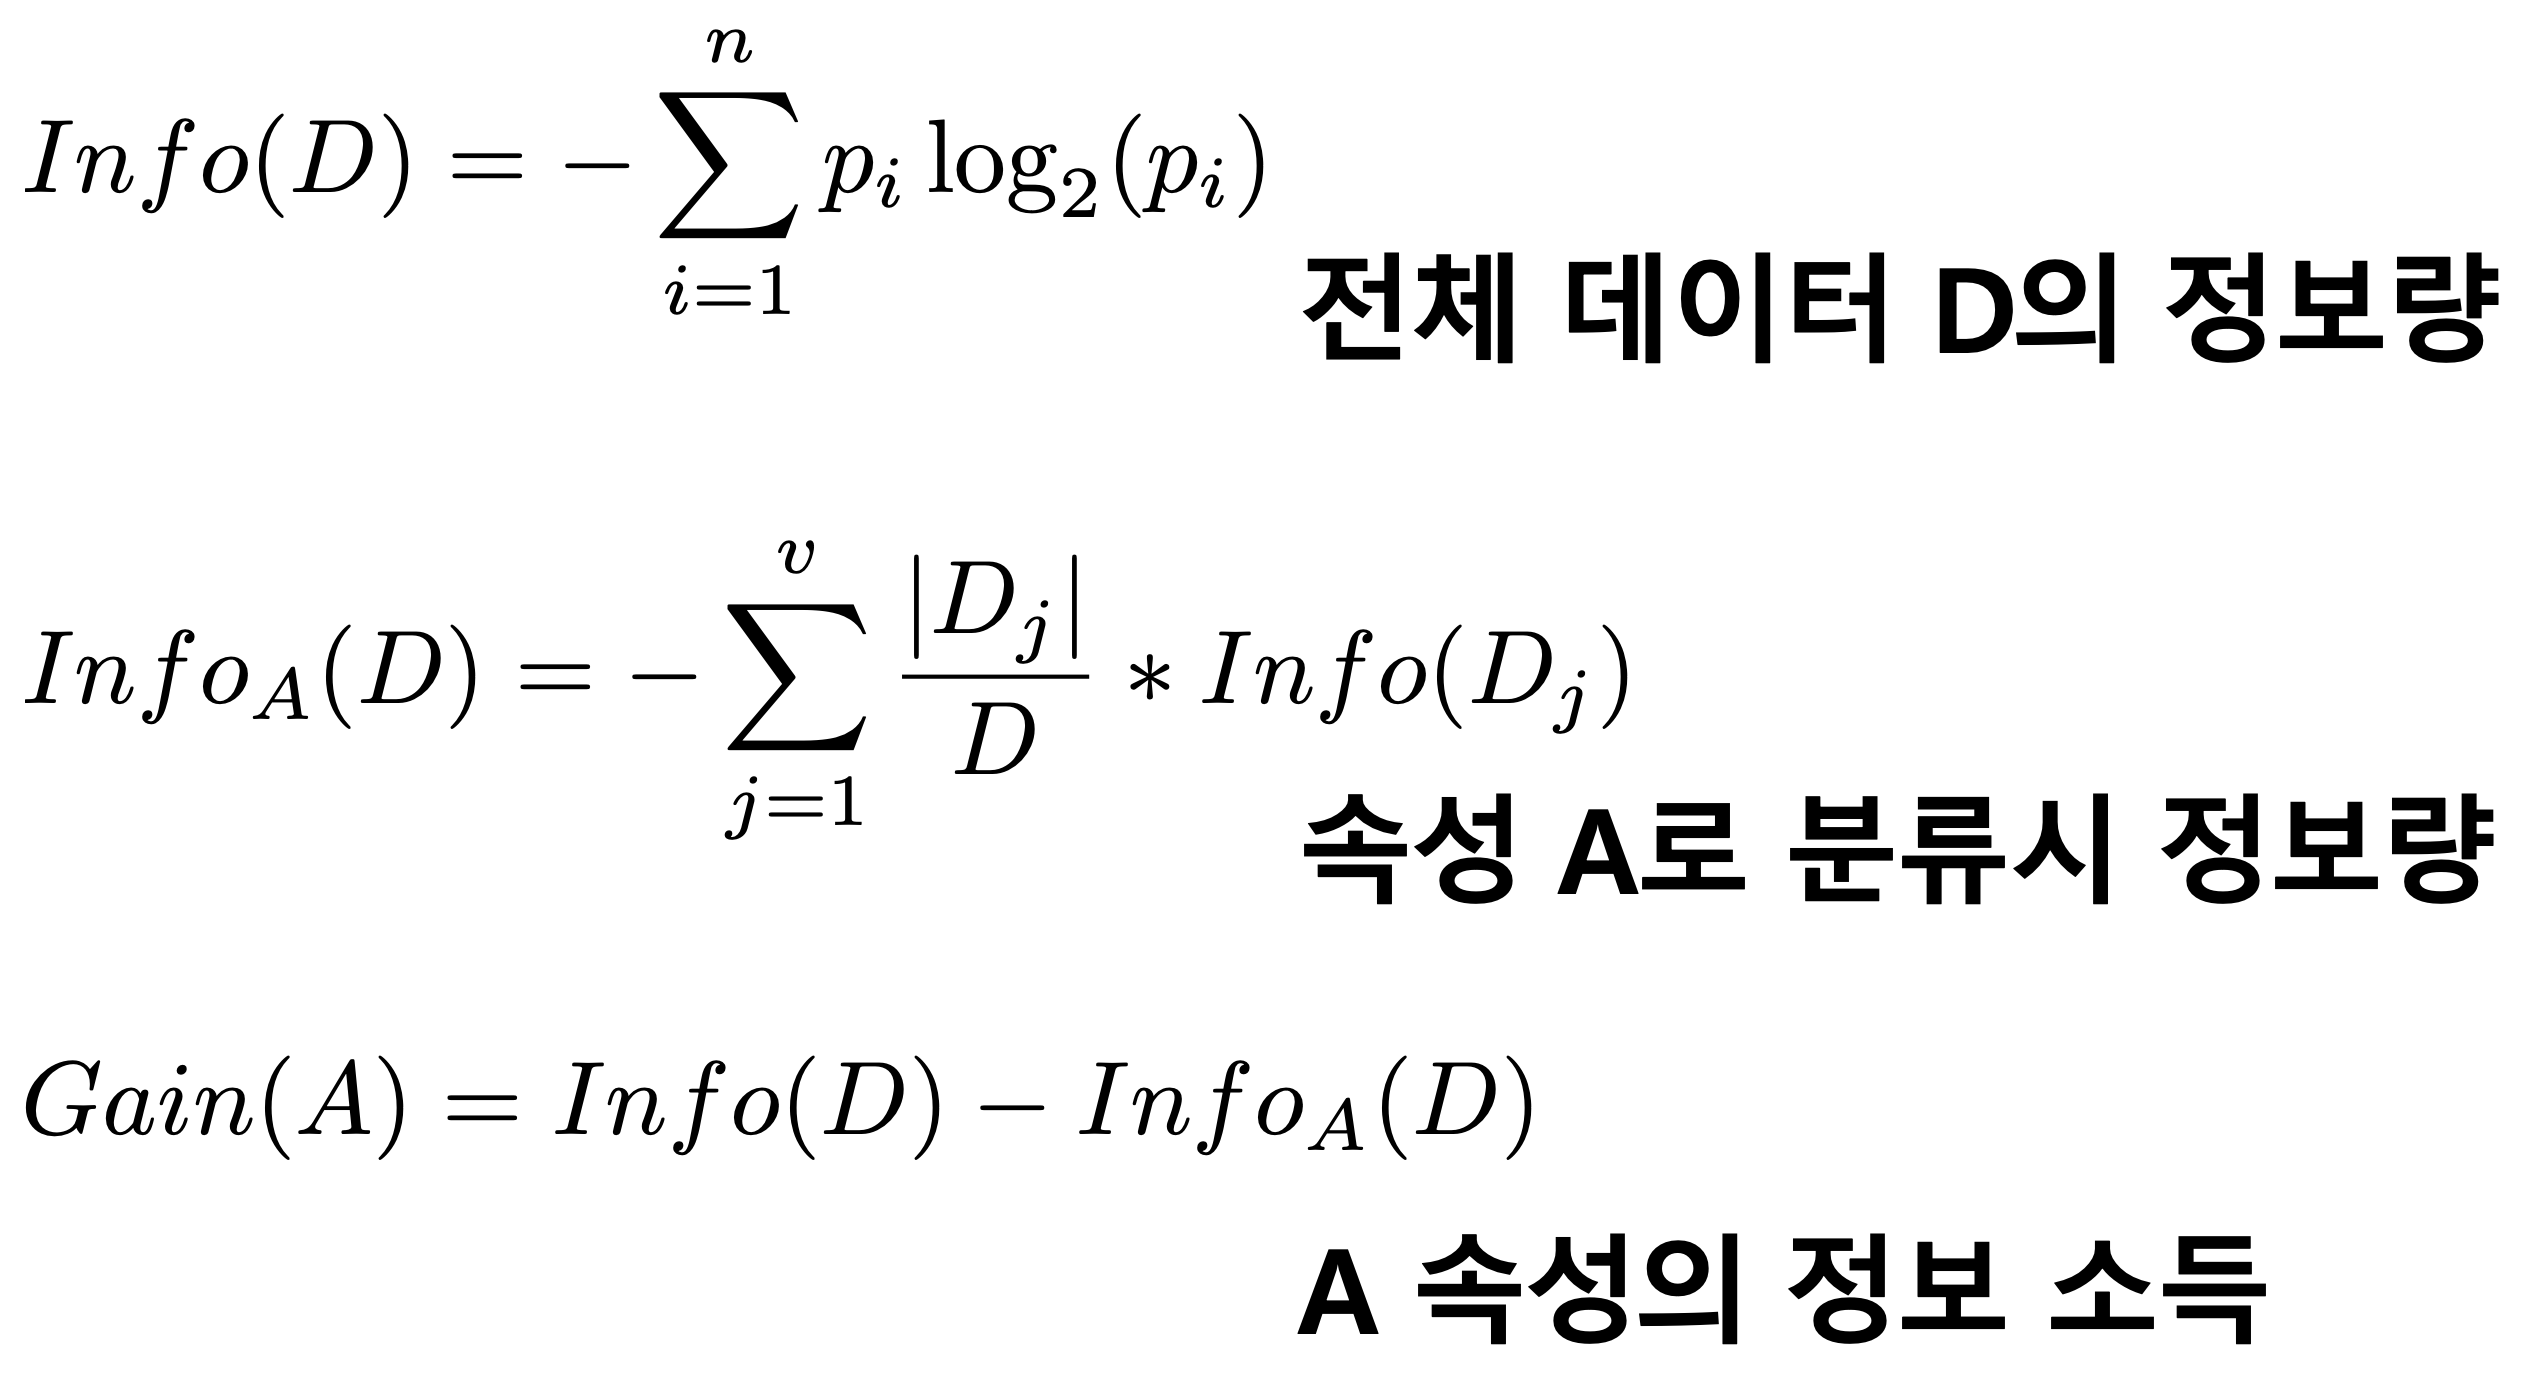
- 

In [ ]:
import pandas as pd 
import numpy as np 

In [ ]:
pd_data = pd.read_csv('https://raw.githubusercontent.com/AugustLONG/ML01/master/01decisiontree/AllElectronics.csv')
pd_data.drop("RID", axis = 1)
pd_data

In [ ]:
buy = pd_data.loc[pd_data['class_buys_computer'] == 'yes']
not_buy = pd_data.loc[pd_data['class_buys_computer'] == 'no']

In [ ]:
x = np.array([len(buy) / len(pd_data), len(not_buy) / len(pd_data)])
y = np.log2(x)

info_all = -sum(x * y)
info_all

In [ ]:
def get_info(df):
    buy = df.loc[df['class_buys_computer'] == 'yes']
    not_buy = df.loc[df['class_buys_computer'] == 'no']
    x = np.array([len(buy) / len(df), len(not_buy) / len(df)])
    y = np.log2(x[x != 0])
    
    info_all = -sum(x[x != 0] * y)
    return info_all

In [ ]:
get_info(pd_data)

In [ ]:
youth = pd_data.loc[pd_data['age'] == 'youth']
senior = pd_data.loc[pd_data['age'] == 'senior']
middle_aged = pd_data.loc[pd_data['age'] == 'middle_aged']

In [ ]:
get_info(youth)

In [ ]:
get_info(senior)

In [ ]:
get_info(middle_aged)

In [ ]:
def get_attribute_info(df, attribute_name):
    attribute_values = pd_data[attribute_name].unique()
    get_infos = []
    for value in attribute_values:
        split_df = pd_data.loc[pd_data[attribute_name] == value]
        get_infos.append((len(split_df) / len(df)) * get_info(split_df))
    return sum(get_infos)

In [ ]:
get_attribute_info(pd_data, 'age')

In [ ]:
get_info(pd_data) - get_attribute_info(pd_data, 'age')

In [ ]:
get_info(pd_data) - get_attribute_info(pd_data, 'income')

In [ ]:
get_info(pd_data) - get_attribute_info(pd_data, 'student')

In [ ]:
get_info(pd_data) - get_attribute_info(pd_data, 'credit_rating')

In [ ]:
youth = pd_data.loc[pd_data['age'] == 'youth']

In [ ]:
get_info(youth) - get_attribute_info(youth, 'income')

In [ ]:
get_info(youth) - get_attribute_info(youth, 'student')

In [ ]:
get_info(youth) - get_attribute_info(youth, 'credit_rating')